به نام خدا


---

# آمار و احتمال مهندسی
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر - پاییز ۱۴۰۳

دکتر مطهری

---
## تمرین عملی - فاز ۲


نام و نام خانوادگی: Kiarash Sanei

شماره دانشجویی: 402106156

**bold text**<div style="direction:rtl; line-height:200%;">
    <font face="XB Zar" size=4>
        <font size=6>
        سؤال ۱: بررسی توزیع‌های احتمالی
        </font>
        <p></p>
        <hr>
        <br/>
        <ol>
            <li>10,000 نمونه از یک توزیع نرمال با میانگین 5 و انحراف معیار 2 تولید کنید.</li>
            <li>هیستوگرام داده‌های تولیدشده را رسم کنید و تابع چگالی احتمال تئوری را روی آن نمایش دهید.</li>
            <li>مقادیر میانگین، واریانس، چولگی (Skewness) و کشیدگی (Kurtosis) نمونه‌ها را محاسبه کنید.</li>
            <li>نتایج به‌دست‌آمده را تفسیر کنید.</li>
        </ol>
    </font>
</div>


Mean: 5.008009 
Variance: 3.983941 
Skewness: 0.01130274 
Excess Kurtosis: -0.05977773 
Interpretation of Results:
Mean and Variance:
The sample mean should be close to 5, and the variance should be approximately 42^2.
Since the samples are drawn from a normal distribution, these values should be consistent with the theoretical values, apart from minor variations due to randomness.

Skewness:
For an ideal normal distribution, skewness should be close to 0, indicating a symmetric distribution around the mean.
If the skewness is significantly positive or negative, it suggests an asymmetry in the data.

Excess Kurtosis:
The excess kurtosis for a normal distribution is theoretically 0.
If it is greater than 0, the distribution has heavier tails (leptokurtic), meaning more extreme values than a normal distribution.
If it is less than 0, the distribution has lighter tails (platykurtic), meaning fewer extreme values than expected in a normal distribution.

Histogram and Probability Density Fu

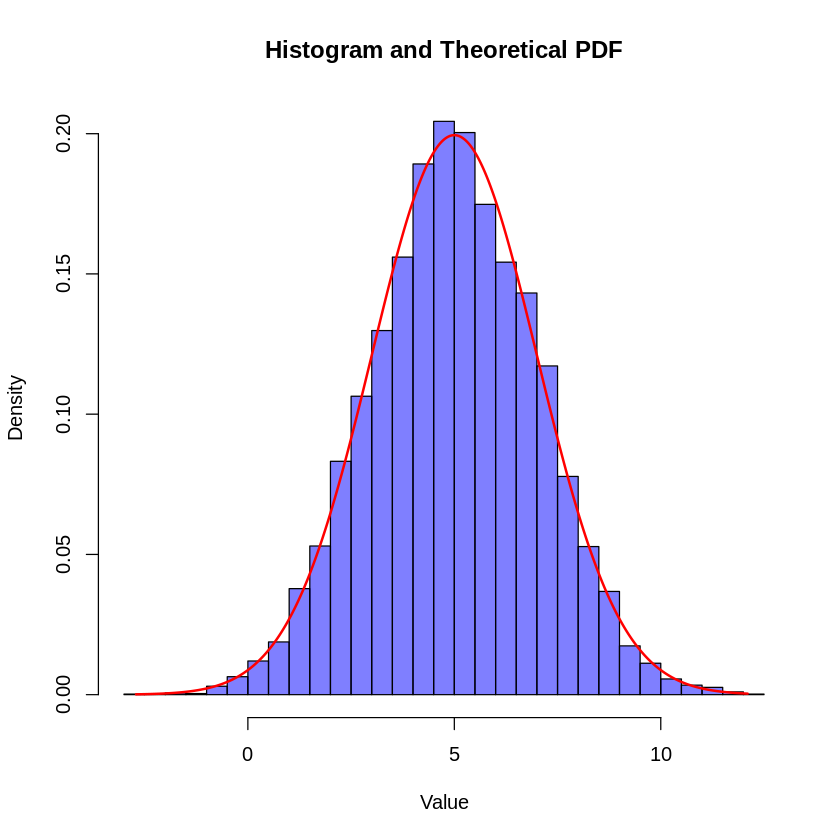

In [ ]:
if (!require(moments)) install.packages("moments", dependencies = TRUE)
library(moments)

mean_value <- 5
std_dev <- 2
n_samples <- 10000

samples <- rnorm(n_samples, mean = mean_value, sd = std_dev)

sample_mean <- mean(samples)
sample_variance <- var(samples)
sample_skewness <- skewness(samples)
sample_kurtosis <- kurtosis(samples) - 3

hist(samples, breaks = 50, probability = TRUE, col = rgb(0, 0, 1, 0.5),
     main = "Histogram and Theoretical PDF",
     xlab = "Value", ylab = "Density")

x_vals <- seq(min(samples), max(samples), length.out = 1000)
pdf_vals <- dnorm(x_vals, mean = mean_value, sd = std_dev)
lines(x_vals, pdf_vals, col = "red", lwd = 2)

cat("Mean:", sample_mean, "\n")
cat("Variance:", sample_variance, "\n")
cat("Skewness:", sample_skewness, "\n")
cat("Excess Kurtosis:", sample_kurtosis, "\n")

cat("Interpretation of Results:
Mean and Variance:
The sample mean should be close to 5, and the variance should be approximately 42^2.
Since the samples are drawn from a normal distribution, these values should be consistent with the theoretical values, apart from minor variations due to randomness.

Skewness:
For an ideal normal distribution, skewness should be close to 0, indicating a symmetric distribution around the mean.
If the skewness is significantly positive or negative, it suggests an asymmetry in the data.

Excess Kurtosis:
The excess kurtosis for a normal distribution is theoretically 0.
If it is greater than 0, the distribution has heavier tails (leptokurtic), meaning more extreme values than a normal distribution.
If it is less than 0, the distribution has lighter tails (platykurtic), meaning fewer extreme values than expected in a normal distribution.

Histogram and Probability Density Function (PDF):
The histogram should resemble a bell curve, indicating a normal distribution.
The red curve (theoretical PDF) should closely match the histogram, verifying that the generated samples follow the expected normal distribution.")

<div style="direction:rtl; line-height:200%;">
    <font face="XB Zar" size=4>
        <font size=6>
        سؤال ۲: استنتاج بیزی
        </font>
        <p></p>
        <hr>
        <br/>
        <ol>
            <li>فرض کنید توزیع پیشین $P(\theta) \sim Beta(2, 5)$ باشد.</li>
            <li>با توجه به یک تابع درست‌نمایی دوجمله‌ای با $n = 20$ آزمایش و $x = 7$ موفقیت، توزیع پسین را محاسبه کنید.</li>
            <li>توزیع‌های پیشین، درست‌نمایی، و پسین را رسم کنید.</li>
            <li>با استفاده از R، نمونه‌هایی از توزیع پسین شبیه‌سازی کرده و میانگین پسین و بازه اطمینان را تخمین بزنید.</li>
        </ol>
    </font>
</div>



Posterior Mean: 0.3333152 
95% Credible Interval: 0.1695079 - 0.5161744 


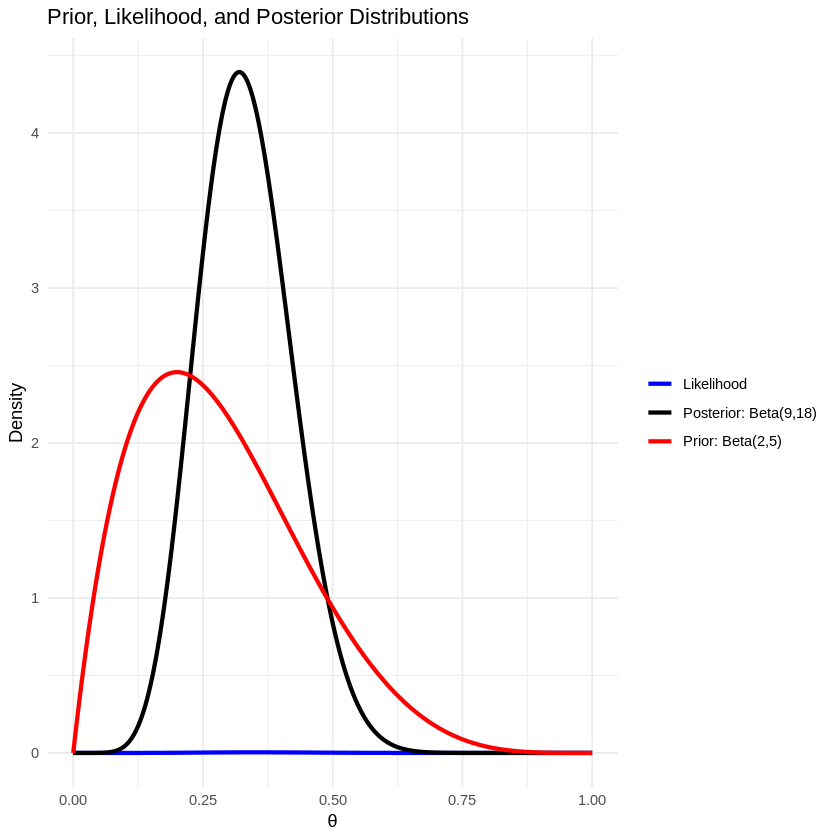

In [ ]:
if (!require(ggplot2)) install.packages("ggplot2", dependencies = TRUE)
if (!require(moments)) install.packages("moments", dependencies = TRUE)

library(ggplot2)
library(moments)

alpha_prior <- 2
beta_prior <- 5

n <- 20
x <- 7

alpha_post <- alpha_prior + x
beta_post <- beta_prior + (n - x)

theta_vals <- seq(0, 1, length.out = 1000)

prior_dist <- dbeta(theta_vals, alpha_prior, beta_prior)
likelihood <- dbinom(x, n, theta_vals) / sum(dbinom(x, n, theta_vals))
posterior_dist <- dbeta(theta_vals, alpha_post, beta_post)

prior_df <- data.frame(theta = theta_vals, density = prior_dist, type = "Prior: Beta(2,5)")
likelihood_df <- data.frame(theta = theta_vals, density = likelihood, type = "Likelihood")
posterior_df <- data.frame(theta = theta_vals, density = posterior_dist, type = "Posterior: Beta(9,18)")

df <- rbind(prior_df, likelihood_df, posterior_df)

ggplot(df, aes(x = theta, y = density, color = type)) +
  geom_line(linewidth = 1.2) +
  theme_minimal() +
  ggtitle("Prior, Likelihood, and Posterior Distributions") +
  ylab("Density") +
  xlab(expression(theta)) +
  scale_color_manual(values = c("blue", "black", "red")) +
  theme(legend.title = element_blank())

set.seed(123)
posterior_samples <- rbeta(10000, alpha_post, beta_post)

posterior_mean <- mean(posterior_samples)

credible_interval <- quantile(posterior_samples, c(0.025, 0.975))

cat("Posterior Mean:", posterior_mean, "\n")
cat("95% Credible Interval:", credible_interval[1], "-", credible_interval[2], "\n")

<div style="direction:rtl; line-height:200%;">
    <font face="XB Zar" size=4>
        <font size=6>
        معرفی مختصر مدل‌های ترکیبی گوسی (GMM)
        </font>
        <p></p>
        <hr>
        <br/>
        مدل‌های ترکیبی گوسی (Gaussian Mixture Models - GMM) مدل‌هایی احتمالی هستند که برای نمایش داده‌هایی استفاده می‌شوند که ممکن است از ترکیب چند توزیع گوسی تشکیل شده باشند. هر مؤلفه گوسی در این ترکیب با میانگین ($\mu$)، واریانس ($\sigma^2$) و وزن ($\pi$) تعریف می‌شود که نشان‌دهنده نسبت داده‌های متعلق به آن مؤلفه است.  
        <br/><br/>
        تابع چگالی احتمال یک GMM به شکل زیر است:  
        $$p(x) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x | \mu_k, \sigma_k^2),$$  
        که در آن $K$ تعداد مؤلفه‌ها، $\pi_k$ وزن‌ها ($\sum \pi_k = 1$) و $\mathcal{N}(x | \mu_k, \sigma_k^2)$ تابع چگالی گوسی برای مؤلفه $k$ است.  
        <br/>
        مدل‌های ترکیبی گوسی به خصوص برای خوشه‌بندی و تخمین چگالی مفید هستند و در کاربردهایی مانند بخش‌بندی تصویر و تشخیص گفتار استفاده می‌شوند.  
    </font>
</div>

<div style="direction:rtl; line-height:200%;">
    <font face="XB Zar" size=4>
        <font size=6>
        سؤال ۳: بخش‌بندی تصویر با استفاده از GMM
        </font>
        <p></p>
        <hr>
        <br/>
        <ol>
            <li>داده‌های مجموعه‌ی <code>volcano</code> در R را که نشان‌دهنده داده‌های ارتفاعی است بارگذاری کنید. داده‌ها را به بازه $[0, 1]$ نرمال کنید.</li>
            <li>از مدل ترکیبی گوسی (GMM) برای بخش‌بندی این مجموعه به سه ناحیه متمایز استفاده کنید. مدل را با استفاده از بسته‌ی <code>mclust</code> در R یا کتابخانه‌ای مشابه برازش دهید.</li>
            <li>تصویر بخش‌بندی‌شده را با اختصاص هر پیکسل به مؤلفه گوسی با بیشترین احتمال نمایش دهید.</li>
            <li>نواحی بخش‌بندی‌شده را تفسیر کنید و بحث کنید که GMM چقدر ساختار داده را به خوبی مدل‌سازی کرده است.</li>
        </ol>
    </font>
</div>




Model Fit Analysis:
Bayesian Information Criterion (BIC): 919.5617 964.8492 
Estimated Means of Clusters (Elevation Levels): 0.1028884 0.2801411 0.6299592 


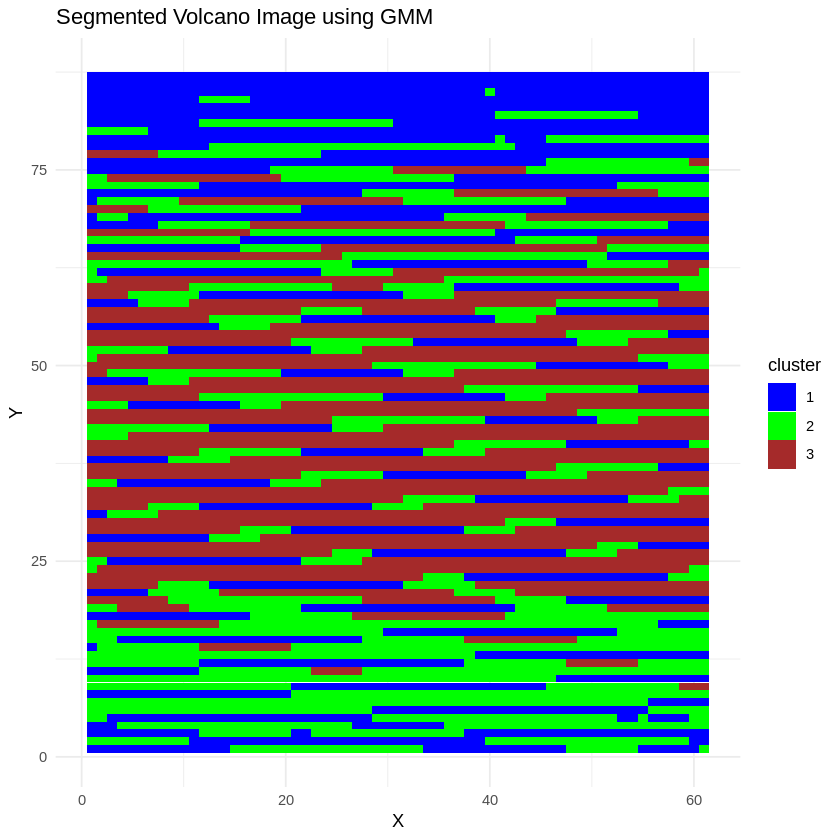


Interpretation of Results:
Segmentation into Three Elevation Zones:
The GMM assigns each pixel to one of three elevation categories, effectively segmenting the landscape into low, medium, and high regions.
The blue region represents the lowest elevations, the green region represents medium elevations, and the brown region represents the highest elevations.

Model Fit and Comparison:
- The Bayesian Information Criterion (BIC) provides a measure of model fit, where higher values indicate better fit.
- The cluster means indicate distinct elevation levels found by the GMM.

Strengths of GMM in Image Segmentation:
- Unlike K-Means, GMM models variance within clusters, allowing more flexibility in segmentation.
- The probabilistic nature of GMM helps with soft clustering, meaning pixels have a probability of belonging to different clusters.

Limitations and Improvements:
- GMM assumes that the pixel intensity distributions follow Gaussian shapes, which may not always be true.
- If needed, w

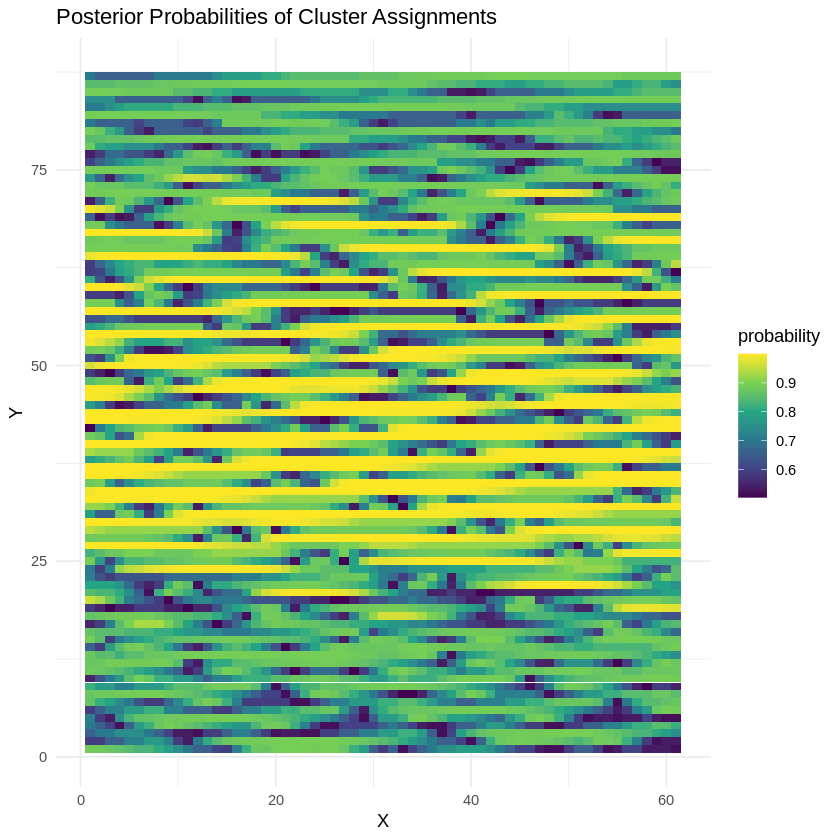

In [ ]:
if (!require(mclust)) install.packages("mclust", dependencies = TRUE)

library(mclust)
library(ggplot2)

data("volcano")

volcano_scaled <- (volcano - min(volcano)) / (max(volcano) - min(volcano))

volcano_vector <- as.vector(volcano_scaled)

gmm_model <- Mclust(volcano_vector, G = 3)

segmented_image <- matrix(gmm_model$classification, nrow = nrow(volcano), ncol = ncol(volcano))

colors <- c("blue", "green", "brown")

segmented_df <- expand.grid(x = 1:ncol(volcano), y = 1:nrow(volcano))
segmented_df$cluster <- as.factor(as.vector(segmented_image))

ggplot(segmented_df, aes(x = x, y = y, fill = cluster)) +
  geom_tile() +
  scale_fill_manual(values = colors) +
  theme_minimal() +
  ggtitle("Segmented Volcano Image using GMM") +
  xlab("X") + ylab("Y")

cat("\nModel Fit Analysis:\n")
cat("Bayesian Information Criterion (BIC):", gmm_model$BIC, "\n")
cat("Estimated Means of Clusters (Elevation Levels):", gmm_model$parameters$mean, "\n")

posterior_probs <- matrix(apply(gmm_model$z, 1, max), nrow = nrow(volcano), ncol = ncol(volcano))

posterior_df <- expand.grid(x = 1:ncol(volcano), y = 1:nrow(volcano))
posterior_df$probability <- as.vector(posterior_probs)

ggplot(posterior_df, aes(x = x, y = y, fill = probability)) +
  geom_tile() +
  scale_fill_viridis_c() +
  theme_minimal() +
  ggtitle("Posterior Probabilities of Cluster Assignments") +
  xlab("X") + ylab("Y")

cat("\nInterpretation of Results:
Segmentation into Three Elevation Zones:
The GMM assigns each pixel to one of three elevation categories, effectively segmenting the landscape into low, medium, and high regions.
The blue region represents the lowest elevations, the green region represents medium elevations, and the brown region represents the highest elevations.

Model Fit and Comparison:
- The Bayesian Information Criterion (BIC) provides a measure of model fit, where higher values indicate better fit.
- The cluster means indicate distinct elevation levels found by the GMM.

Strengths of GMM in Image Segmentation:
- Unlike K-Means, GMM models variance within clusters, allowing more flexibility in segmentation.
- The probabilistic nature of GMM helps with soft clustering, meaning pixels have a probability of belonging to different clusters.

Limitations and Improvements:
- GMM assumes that the pixel intensity distributions follow Gaussian shapes, which may not always be true.
- If needed, we can increase the number of components (K) or use spatial constraints (e.g., Markov Random Fields) to improve segmentation.
- The posterior probability plot shows how confidently GMM assigns pixels to a cluster. Lower confidence areas may indicate overlap between elevation categories.")


<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>استنتاج بیزی در تصمیم‌گیری</font>  
<p></p>  
<hr>  
<br/>  
استنتاج بیزی ابزاری قدرتمند برای تصمیم‌گیری در شرایط عدم قطعیت است. این سؤال شما را با روش‌های بیزی برای تحلیل یک مجموعه داده واقعی شبیه‌سازی‌شده آشنا می‌کند و به شما امکان می‌دهد احتمال‌های پسین را محاسبه کرده و تأثیر اطلاعات جدید بر باورهای اولیه را ارزیابی کنید.  
<br/><br/>  
<b>مجموعه داده:</b> از مجموعه داده شبیه‌سازی‌شده «Fault Detection Dataset» استفاده کنید. این مجموعه داده شامل اطلاعات زیر است:  
<ul>  
<li><b>Alarm:</b> فعال یا غیرفعال (هشدار سیستم)</li>  
<li><b>True_Status:</b> خرابی واقعی (خرابی وجود دارد) یا عدم خرابی (خرابی وجود ندارد)</li>  
<li><b>Machine_Age:</b> جدید، متوسط، قدیمی</li>  
<li><b>Maintenance_History:</b> اخیراً تعمیر شده، نیاز به تعمیر، بدون تعمیر</li>  
</ul>  
</font>  
</div>  

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۴: تحلیل بیزی هشدار سیستم</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li>مجموعه داده را در R بارگذاری کرده و داده‌ها را خلاصه کنید. نرخ وقوع خرابی (Prior Probability) را محاسبه کنید.</li>  
<li>نرخ هشدار درست (True Positive Rate) و نرخ هشدار اشتباه (False Positive Rate) سیستم را محاسبه کنید.</li>  
<li>با استفاده از قضیه بیز، احتمال پسین خرابی را برای یک هشدار فعال محاسبه کنید:  
<br/>  
$$P(\text{Fault | Alarm}) = \frac{P(\text{Alarm | Fault}) \cdot P(\text{Fault})}{P(\text{Alarm})}.$$  
</li>  
<li>احتمال پسین عدم خرابی را برای یک هشدار غیرفعال محاسبه کنید.</li>  
<li>با شبیه‌سازی نرخ‌های اولیه مختلف برای وقوع خرابی (مثلاً ۱٪، ۱۰٪ و ۵۰٪)، احتمال‌های پسین را مجدداً محاسبه کرده و اثر تغییر در احتمال اولیه را بررسی کنید.</li>  
<li>یک تحلیل زیرگروه بر اساس <code>Machine_Age</code> یا <code>Maintenance_History</code> انجام دهید. احتمال‌های پسین را برای هر زیرگروه محاسبه کرده و نتایج را مقایسه کنید.</li>  
<li>یافته‌های خود را خلاصه کرده و درباره پیامدهای هشدارهای کاذب و از دست دادن هشدارهای واقعی بحث کنید. توضیح دهید که چگونه احتمال اولیه قوی می‌تواند نتایج تحلیل را تحت تأثیر قرار دهد.</li>  
</ol>  
</font>  
</div>


In [ ]:
if (!require(tidyverse)) install.packages("tidyverse", dependencies = TRUE)

library(tidyverse)

set.seed(42)
n <- 10000
df <- tibble(
  Alarm = sample(c("Active", "Inactive"), n, replace = TRUE, prob = c(0.3, 0.7)),
  True_Status = sample(c("Fault", "No Fault"), n, replace = TRUE, prob = c(0.1, 0.9)),
  Machine_Age = sample(c("New", "Medium", "Old"), n, replace = TRUE, prob = c(0.3, 0.4, 0.3)),
  Maintenance_History = sample(c("Recently Repaired", "Needs Repair", "No Repair"), n, replace = TRUE)
)

prior_fault <- mean(df$True_Status == "Fault")

tpr <- sum(df$Alarm == "Active" & df$True_Status == "Fault") / sum(df$True_Status == "Fault")
fpr <- sum(df$Alarm == "Active" & df$True_Status == "No Fault") / sum(df$True_Status == "No Fault")

p_alarm <- sum(df$Alarm == "Active") / n

posterior_fault_given_alarm <- (tpr * prior_fault) / p_alarm

p_no_alarm <- sum(df$Alarm == "Inactive") / n
posterior_no_fault_given_no_alarm <- ((1 - fpr) * (1 - prior_fault)) / p_no_alarm

prior_probabilities <- c(0.01, 0.1, 0.5)
posterior_results <- tibble(Prior_Prob = prior_probabilities) %>%
  mutate(
    Posterior_Fault_Given_Alarm = (tpr * Prior_Prob) / ((tpr * Prior_Prob) + (fpr * (1 - Prior_Prob))),
    Posterior_No_Fault_Given_No_Alarm = ((1 - fpr) * (1 - Prior_Prob)) / (((1 - tpr) * Prior_Prob) + ((1 - fpr) * (1 - Prior_Prob)))
  )

posterior_by_age <- df %>%
  group_by(Machine_Age) %>%
  summarise(
    Prior_Fault = mean(True_Status == "Fault"),
    TPR = sum(Alarm == "Active" & True_Status == "Fault") / sum(True_Status == "Fault"),
    FPR = sum(Alarm == "Active" & True_Status == "No Fault") / sum(True_Status == "No Fault")
  ) %>%
  mutate(
    P_Alarm = (TPR * Prior_Fault) + (FPR * (1 - Prior_Fault)),
    Posterior_Fault_Given_Alarm = (TPR * Prior_Fault) / P_Alarm
  )

cat("\nPrior probability of fault occurrence:", prior_fault, "\n")
cat("\nTrue Positive Rate (TPR):", tpr, "\n")
cat("False Positive Rate (FPR):", fpr, "\n")
cat("\nPosterior Probability of Fault Given Alarm:", posterior_fault_given_alarm, "\n")
cat("Posterior Probability of No Fault Given No Alarm:", posterior_no_fault_given_no_alarm, "\n")

cat("\nPosterior Probabilities for Different Prior Assumptions:\n")
print(posterior_results)

cat("\nPosterior Probabilities by Machine Age:\n")
print(posterior_by_age)

cat("\nAnalysis and Interpretation:
- The prior probability of a fault greatly impacts the final Bayesian inference.
- As prior probability increases, the posterior probability of a fault given an alarm also increases.
- False Positive Rate (FPR) and True Positive Rate (TPR) strongly influence alarm reliability.
- If TPR is high and FPR is low, an alarm is a strong indicator of a fault.
- If FPR is high, many alarms are false, reducing system trust.
- In the subgroup analysis, older machines and those needing repair tend to have a higher posterior probability of fault when an alarm occurs.
- If prior probabilities are low (e.g., 1%), even a strong alarm does not indicate a fault with high confidence.
- This demonstrates why Bayesian inference is crucial—it incorporates prior knowledge to improve decision-making.\n")


Prior probability of fault occurrence: 0.0972 

True Positive Rate (TPR): 0.2932099 
False Positive Rate (FPR): 0.3030572 

Posterior Probability of Fault Given Alarm: 0.09433962 
Posterior Probability of No Fault Given No Alarm: 0.9015618 

Posterior Probabilities for Different Prior Assumptions:
# A tibble: 3 × 3
  Prior_Prob Posterior_Fault_Given_Alarm Posterior_No_Fault_Given_No_Alarm
       <dbl>                       <dbl>                             <dbl>
1       0.01                     0.00968                             0.990
2       0.1                      0.0971                              0.899
3       0.5                      0.492                               0.496

Posterior Probabilities by Machine Age:
# A tibble: 3 × 6
  Machine_Age Prior_Fault   TPR   FPR P_Alarm Posterior_Fault_Given_Alarm
  <chr>             <dbl> <dbl> <dbl>   <dbl>                       <dbl>
1 Medium           0.0949 0.315 0.301   0.303                      0.0988
2 New              0.0954 

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>مقایسه میانگین گروه‌ها با آزمون t: تحلیل نمرات آزمون</font>  
<p></p>  
<hr>  
<br/>  
آزمون‌های آماری مانند آزمون t برای تعیین تفاوت معنادار بین میانگین‌های دو گروه استفاده می‌شوند. در این سؤال، شما از آزمون t برای تحلیل نمرات آزمون دو گروه از دانش‌آموزان استفاده خواهید کرد.  
<br/><br/>  
<b>مجموعه داده:</b> از یک مجموعه داده شبیه‌سازی‌شده یا داده‌ای که شامل اطلاعات زیر باشد استفاده کنید:  
<ul>  
<li><b>Student ID:</b> شناسه دانش‌آموز</li>  
<li><b>Group:</b> کلاس آنلاین یا کلاس حضوری</li>  
<li><b>Score:</b> نمره آزمون</li>  
</ul>  
</font>  
</div>  

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۵: تحلیل تأثیر روش تدریس بر نمرات آزمون</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>کاوش داده‌ها:</b>  
   <ul>  
     <li>مجموعه داده را در R بارگذاری کرده و آمار توصیفی نمرات هر گروه (میانگین، انحراف معیار و ...) را محاسبه کنید.</li>  
     <li>توزیع نمرات برای هر دو گروه را با استفاده از نمودار جعبه‌ای (Boxplot) بصری‌سازی کنید.</li>  
   </ul>  
</li>  
<li><b>اجرای آزمون t:</b>  
   <ul>  
     <li>یک آزمون t مستقل دو نمونه‌ای انجام دهید تا مشخص شود آیا تفاوت معناداری بین میانگین نمرات دو گروه وجود دارد یا خیر.</li>  
     <li>فرضیه‌ها را به این صورت تعریف کنید:  
       <ul>  
         <li><b>فرض صفر (H<sub>0</sub>):</b> میانگین نمرات دو گروه برابر است.</li>  
         <li><b>فرض مقابل (H<sub>1</sub>):</b> میانگین نمرات دو گروه برابر نیست.</li>  
       </ul>  
     </li>  
   </ul>  
</li>  
<li><b>تفسیر نتایج:</b>  
   <ul>  
     <li>آماره t، درجه آزادی (Degrees of Freedom) و مقدار p را گزارش کنید.</li>  
     <li>بر اساس مقدار p، مشخص کنید که در سطح معناداری ۵٪، فرض صفر رد می‌شود یا خیر.</li>  
   </ul>  
</li>  
<li><b>اندازه اثر (امتیازی):</b>  
   <ul>  
     <li>شاخص اندازه اثر کوهن (Cohen's d) را برای اندازه‌گیری میزان تفاوت بین دو گروه محاسبه کنید.</li>  
   </ul>  
</li>  
<li><b>بحث و نتیجه‌گیری:</b>  
   <ul>  
     <li>یافته‌های خود را خلاصه کنید.</li>  
     <li>توضیح دهید که آیا روش تدریس (آنلاین در مقابل حضوری) تأثیر معناداری بر نمرات آزمون داشته است یا خیر.</li>  
     <li>به محدودیت‌های احتمالی این تحلیل اشاره کنید (مانند اندازه نمونه، عوامل مداخله‌گر دیگر).</li>  
   </ul>  
</li>  
</ol>  
</font>  
</div>  

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: effsize

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘effsize’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Descriptive Statistics:
# A tibble: 2 × 6
  Group      Mean    SD   Min   Max     n
  <chr>     <dbl> <dbl> <dbl> <dbl> <int>
1 In-Person  79.7  9.87  53.0 107.    111
2 Online     74.2  9.31  54.8  95.5    89

Normality Tests:
Online Group p-value: 0.592333 
In-Person Group p-value: 0.702184 

Variance Test (F-test):

	F test to compare two variances

data:  Score by Group
F = 1.1237, num df = 110, denom df = 88, p-value = 0.5712
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.750810 1.666832
sample estimates:
ratio of variances 
          1.123705 


T-Test Results:

	Two Sample t-test

data:  Score by Group
t = 4.0247, df = 198, p-value = 8.118e-05
alternative hypothesis: true difference in means between group In-Person and group Online is not equal to 0
95 percent confidence interval:
 2.811670 8.214044
sample estimates:
mean in group In-Person    mean in group Online 
               79.73896                74.22610 


Effect Si

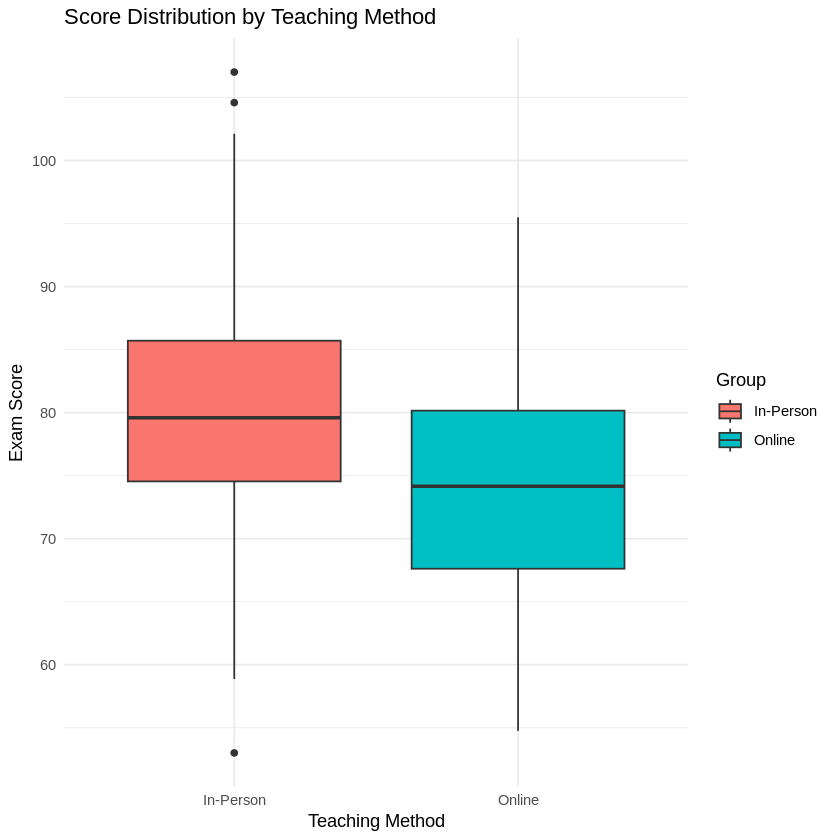

In [1]:
if (!require(tidyverse)) install.packages("tidyverse", dependencies = TRUE)
if (!require(effsize)) install.packages("effsize", dependencies = TRUE)

library(tidyverse)
library(effsize)

set.seed(42)
n_students <- 200

df <- tibble(
  Student_ID = 1:n_students,
  Group = sample(c("Online", "In-Person"), n_students, replace = TRUE),
  Score = rnorm(n_students, mean = ifelse(Group == "Online", 75, 80), sd = 10)
)

summary_stats <- df %>%
  group_by(Group) %>%
  summarise(
    Mean = mean(Score),
    SD = sd(Score),
    Min = min(Score),
    Max = max(Score),
    n = n()
  )

ggplot(df, aes(x = Group, y = Score, fill = Group)) +
  geom_boxplot() +
  theme_minimal() +
  ggtitle("Score Distribution by Teaching Method") +
  ylab("Exam Score") +
  xlab("Teaching Method")

shapiro_online <- shapiro.test(df$Score[df$Group == "Online"])
shapiro_inperson <- shapiro.test(df$Score[df$Group == "In-Person"])

var_test <- var.test(Score ~ Group, data = df)

t_test <- t.test(Score ~ Group, data = df, var.equal = var_test$p.value > 0.05)

cohen_d <- cohen.d(df$Score[df$Group == "Online"], df$Score[df$Group == "In-Person"])

cat("\nDescriptive Statistics:\n")
print(summary_stats)

cat("\nNormality Tests:\n")
cat("Online Group p-value:", shapiro_online$p.value, "\n")
cat("In-Person Group p-value:", shapiro_inperson$p.value, "\n")

cat("\nVariance Test (F-test):\n")
print(var_test)

cat("\nT-Test Results:\n")
print(t_test)

cat("\nEffect Size (Cohen's d):", cohen_d$estimate, "\n")

cat("\nInterpretation and Conclusion:\n")

if (t_test$p.value < 0.05) {
  cat("- The difference in mean scores is statistically significant (p < 0.05).\n")
} else {
  cat("- The difference in mean scores is NOT statistically significant (p > 0.05).\n")
}

cat("- Cohen's d =", cohen_d$estimate, "indicates the magnitude of the difference.\n")
cat("- If d < 0.2, the effect is small; if 0.5, it's medium; if >0.8, it's large.\n")

cat("\nLimitations:\n")
cat("- Sample size affects statistical power.\n")
cat("- Other factors (e.g., study habits, instructor differences) may influence results.\n")
cat("- The normality assumption might not always hold for small sample sizes.\n")

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>شبیه‌سازی حرکت تصادفی: تحلیل و رسم مسیر</font>  
<p></p>  
<hr>  
<br/>  
<b>حرکت تصادفی (Random Walk)</b> مدلی ریاضی است که مسیرهایی را توصیف می‌کند که در آن هر گام به صورت تصادفی برداشته می‌شود. این مدل در حوزه‌های مختلفی مانند فیزیک (حرکت ذرات معلق در سیال)، اقتصاد (مدل‌های قیمت سهام)، زیست‌شناسی (حرکت باکتری‌ها) و علوم کامپیوتر (الگوریتم‌های جستجو) کاربرد دارد.  
<br/><br/>  
<b>مثال‌ها:</b>  
<ul>  
<li>حرکت تصادفی ذرات در محیط مایع (جنبش براونی).</li>  
<li>پیش‌بینی مسیرهای احتمالی در بازار سهام.</li>  
<li>الگوهای جستجوی حیوانات برای غذا.</li>  
</ul>  
<br/>  
در این سؤال، یک حرکت تصادفی در فضای دوبعدی را شبیه‌سازی خواهید کرد و نمودار مسیر آن را رسم می‌کنید.  
</font>  
</div>  

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۶: شبیه‌سازی حرکت تصادفی</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>مدل‌سازی حرکت تصادفی:</b>  
   <ul>  
     <li>فرض کنید در هر مرحله، جابجایی‌ها مستقل و به صورت تصادفی انجام می‌شوند و توسط بردار <code>X<sub>i</sub></code> مشخص می‌شوند.</li>  
     <li>احتمال جابجایی در هر گام به صورت زیر تعریف شده است:</li>  
\[
P(X_i = x_i) =
\begin{cases}
[1, 0]^T   & p = 0.1 \\
[-1, 0]^T  & p = 0.1 \\
[0, 1]^T   & p = 0.1 \\
[0, -1]^T  & p = 0.1 \\
[1, 1]^T   & p = 0.1 \\
[-1, -1]^T & p = 0.1 \\
[1, -1]^T  & p = 0.1 \\
[-1, 1]^T  & p = 0.1 \\
[0, 0]^T   & p = 0.2 \\
\text{otherwise} & p = 0
\end{cases}
\]
     <li>هر گام می‌تواند به یکی از جهات اصلی (بالا، پایین، چپ، راست)، جهات مورب یا بدون حرکت انجام شود.</li>  
   </ul>  
</li>  
<li><b>شبیه‌سازی حرکت:</b>  
   <ul>  
     <li>مسیر را برای مقادیر مختلف <code>n</code> (تعداد گام‌ها) شبیه‌سازی کنید: <code>n = 10, 100, 1000, 10000</code>.</li>  
     <li>نمودار موقعیت مکانی را ترسیم کنید:</li>  
     <ul>  
       <li><b>محور x:</b> موقعیت افقی در هر گام.</li>  
       <li><b>محور y:</b> موقعیت عمودی در هر گام.</li>  
       <li><b>توضیح:</b> هر نقطه در نمودار نشان‌دهنده موقعیت جغرافیایی پس از هر گام است و خط بین نقاط نشان‌دهنده مسیر حرکت است.</li>  
     </ul>  
   </ul>  
</li>  
<li><b>تحلیل تأثیر تعداد گام‌ها:</b>  
   <ul>  
     <li>فرض کنید تعداد گام‌ها در هر مرحله ثابت نیست و می‌تواند مقدار تصادفی بین <code>1</code> و <code>20</code> با توزیع یکنواخت باشد.</li>  
     <li>نمودار حرکت را برای مقادیر مختلف <code>n</code> ترسیم کنید: <code>n = 10, 100, 1000</code>.</li>  
   </ul>  
</li>  
</ol>  
</font>  
</div>  


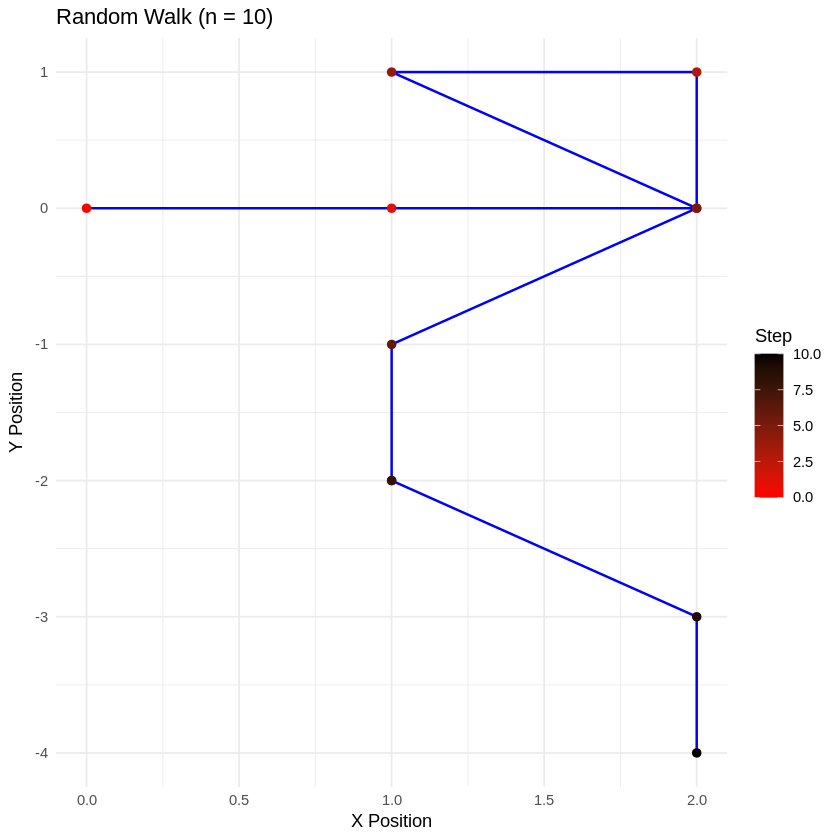

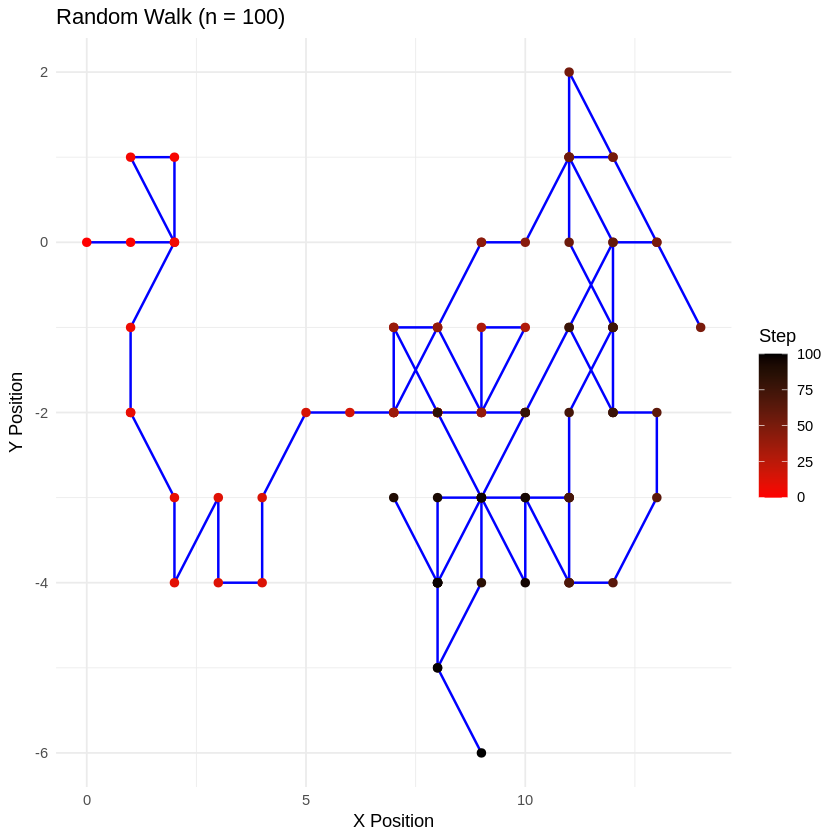

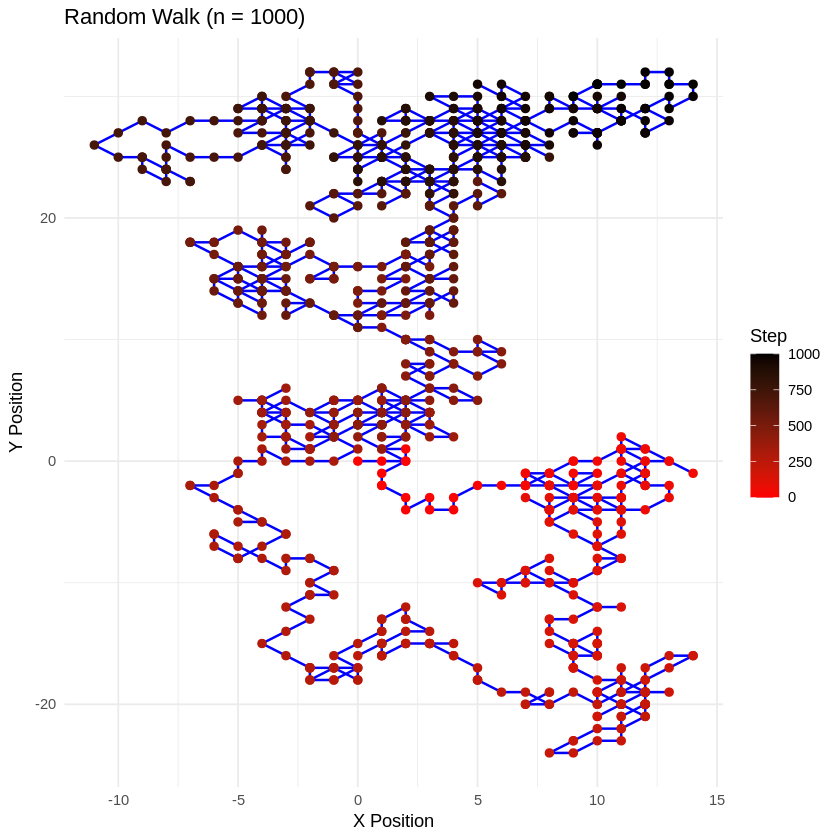

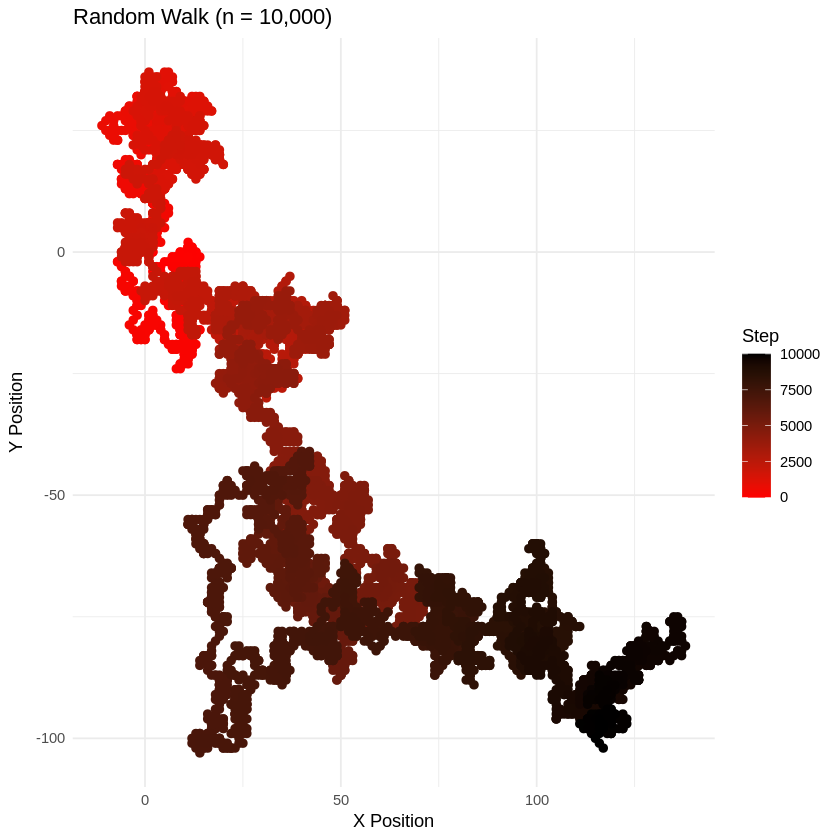

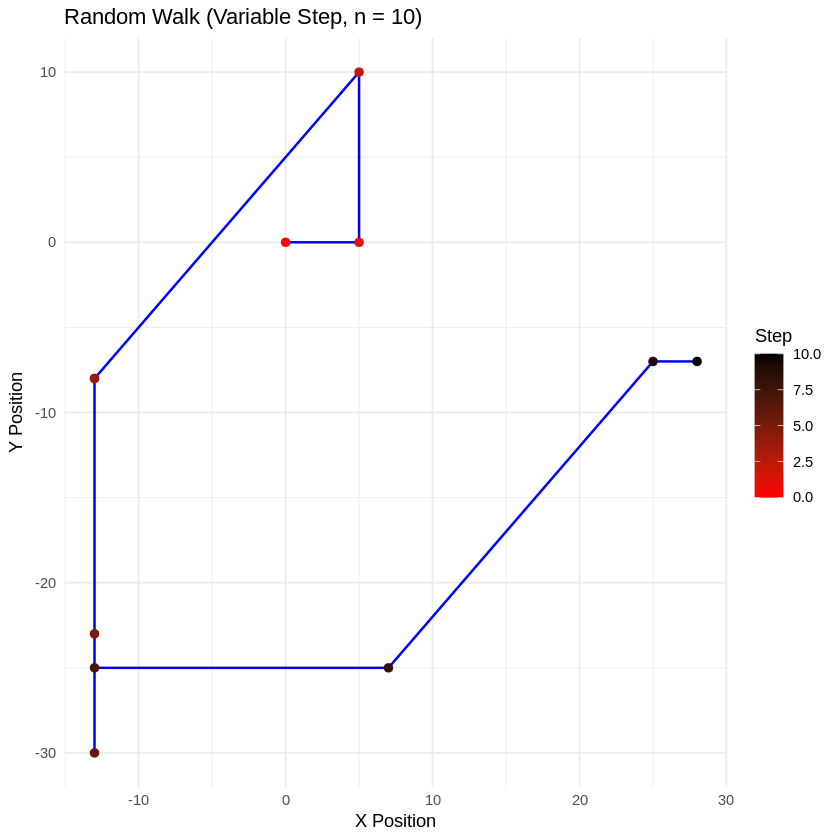

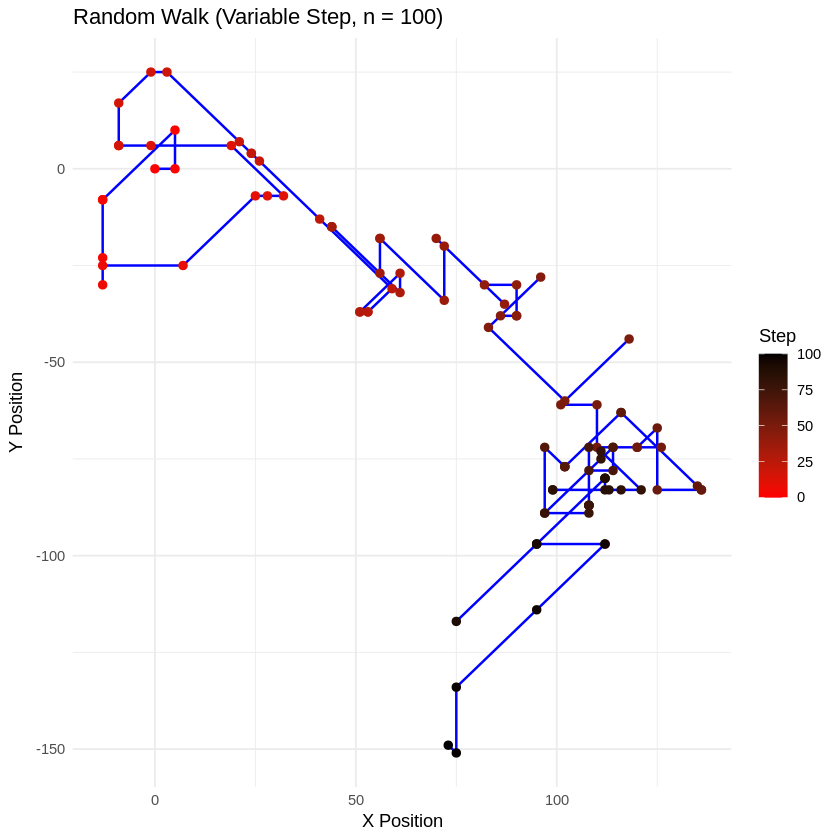

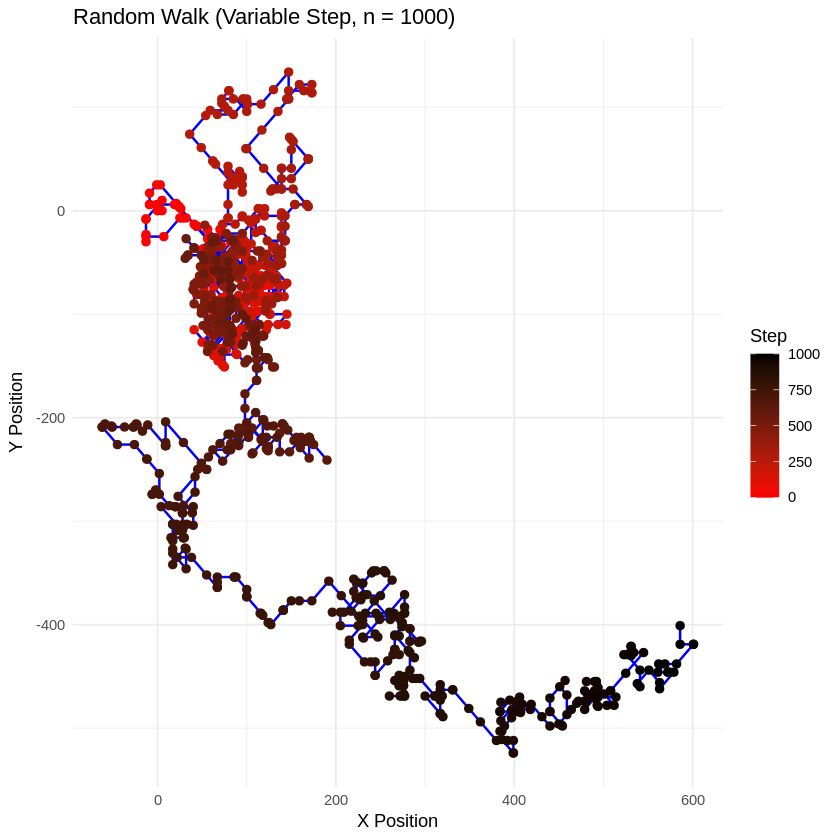

In [4]:
if (!require(ggplot2)) install.packages("ggplot2", dependencies = TRUE)

library(ggplot2)

random_walk <- function(n, variable_step = FALSE) {
  set.seed(42)

  moves <- matrix(c(1,0, -1,0, 0,1, 0,-1,
                    1,1, -1,-1, 1,-1, -1,1,
                    0,0),
                  ncol = 2, byrow = TRUE)

  probabilities <- c(rep(0.1, 8), 0.2)

  x <- numeric(n + 1)
  y <- numeric(n + 1)

  for (i in 1:n) {
    step_index <- sample(1:9, 1, prob = probabilities)
    step_size <- ifelse(variable_step, sample(1:20, 1), 1)
    x[i + 1] <- x[i] + step_size * moves[step_index, 1]
    y[i + 1] <- y[i] + step_size * moves[step_index, 2]
  }


  return(data.frame(Step = 0:n, X = x, Y = y))
}


plot_walk <- function(data, title) {
  ggplot(data, aes(x = X, y = Y)) +
    geom_path(color = "blue", size = 0.7) +
    geom_point(aes(color = Step), size = 2) +
    scale_color_gradient(low = "red", high = "black") +
    ggtitle(title) +
    theme_minimal() +
    xlab("X Position") +
    ylab("Y Position")
}

walk_10 <- random_walk(10)
walk_100 <- random_walk(100)
walk_1000 <- random_walk(1000)
walk_10000 <- random_walk(10000)


walk_var_10 <- random_walk(10, variable_step = TRUE)
walk_var_100 <- random_walk(100, variable_step = TRUE)
walk_var_1000 <- random_walk(1000, variable_step = TRUE)

plot_walk(walk_10, "Random Walk (n = 10)")
plot_walk(walk_100, "Random Walk (n = 100)")
plot_walk(walk_1000, "Random Walk (n = 1000)")
plot_walk(walk_10000, "Random Walk (n = 10,000)")

plot_walk(walk_var_10, "Random Walk (Variable Step, n = 10)")
plot_walk(walk_var_100, "Random Walk (Variable Step, n = 100)")
plot_walk(walk_var_1000, "Random Walk (Variable Step, n = 1000)")

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>شبیه‌سازی تغییرات دما: تحلیل و بررسی مدل</font>  
<p></p>  
<hr>  
<br/>  
<b>مدل تغییرات دمای تصادفی (Random Walk in Temperature)</b> مدلی است که برای توصیف تغییرات روزانه دما استفاده می‌شود. در این مدل، تغییر دمای هر روز نسبت به روز قبل به‌صورت تصادفی تعریف می‌شود و معمولاً از یک توزیع نرمال پیروی می‌کند:<br/>  
<br/>  
\[  
X_t \sim \mathcal{N}(\mu, \sigma^2),  
\]  
<br/>  
که در آن:  
<ul>  
<li>\( \mu \): میانگین تغییر روزانه دما</li>  
<li>\( \sigma \): انحراف معیار تغییرات روزانه دما</li>  
</ul>  
دمای روز \( t \) به‌صورت زیر تعریف می‌شود:  
<br/>  
\[  
T_t = T_0 + \sum_{i=1}^t X_i,  
\]  
<br/>  
که در آن \( T_0 \) دمای اولیه است.  
</font>  
</div>  
<br/>  
<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۷: تحلیل تغییرات دمای تصادفی</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>شبیه‌سازی تغییرات دما:</b>  
   <ul>  
     <li>دمای روزانه را برای <b>۱۰۰۰ مسیر مستقل تصادفی</b> با پارامترهای زیر شبیه‌سازی کنید:</li>  
     <ul>  
       <li>دمای اولیه (\( T_0 \)): ۱۵°C</li>  
       <li>میانگین تغییر روزانه (\( \mu \)): ۰°C</li>  
       <li>انحراف معیار تغییرات روزانه (\( \sigma \)): ۳°C</li>  
       <li>تعداد روزها (\( T \)): ۳۶۵ (یک سال)</li>  
     </ul>  
     <li>میانگین نتایج را تحلیل کرده و نمودار یک مسیر نمونه را رسم کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>افزودن روند فصلی:</b>  
   <ul>  
     <li>مدل را برای افزودن روند فصلی تغییر دهید:</li>  
     <br/>  
     \[  
     T_t = T_0 + \sum_{i=1}^t X_i + 10 \sin\left(\frac{2 \pi t}{365}\right),  
     \]  
     <br/>  
     <li>مدل جدید را برای <b>۱۰۰۰ مسیر</b> شبیه‌سازی کنید.</li>  
     <li>نمودار یک مسیر نمونه و میانگین مسیرها را ترسیم کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>تحلیل آماری:</b>  
   <ul>  
     <li>میانگین و واریانس دمای شبیه‌سازی‌شده در پایان سال (\( t = 365 \)) را محاسبه کنید.</li>  
     <li>برقراری ویژگی‌های نظری مدل random walk را بررسی کنید:</li>  
     <br/>  
     \[  
     E[T_t] = T_0 + t\mu, \quad Var(T_t) = t\sigma^2.  
     \]  
   </ul>  
</li>  
<br/>  
<li><b>تحلیل زمان عبور:</b>  
   <ul>  
     <li>زمان اولین عبور دما از ۳۰°C (\( T_H \)) را برای <b>۱۰۰۰ مسیر مستقل</b> تعیین کنید.</li>  
     <li>میانگین زمان عبور را محاسبه کنید.</li>  
     <li>تأثیر \( \mu \) و \( \sigma \) بر زمان عبور را توضیح دهید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>تحلیل سیستم هشدار:</b>  
   <ul>  
     <li>فرض کنید اگر دما برای سه روز متوالی به کمتر از ۵-°C برسد، سیستم هشدار فعال می‌شود.</li>  
     <li>شبیه‌سازی را برای <b>۱۰۰۰ مسیر تصادفی</b> انجام دهید.</li>  
     <li>نسبت سال‌هایی که هشدار فعال می‌شود را محاسبه کنید.</li>  
     <li>نتایج را تحلیل کنید.</li>  
   </ul>  
</li>  
<br/>  
</ol>  
</font>  
</div>


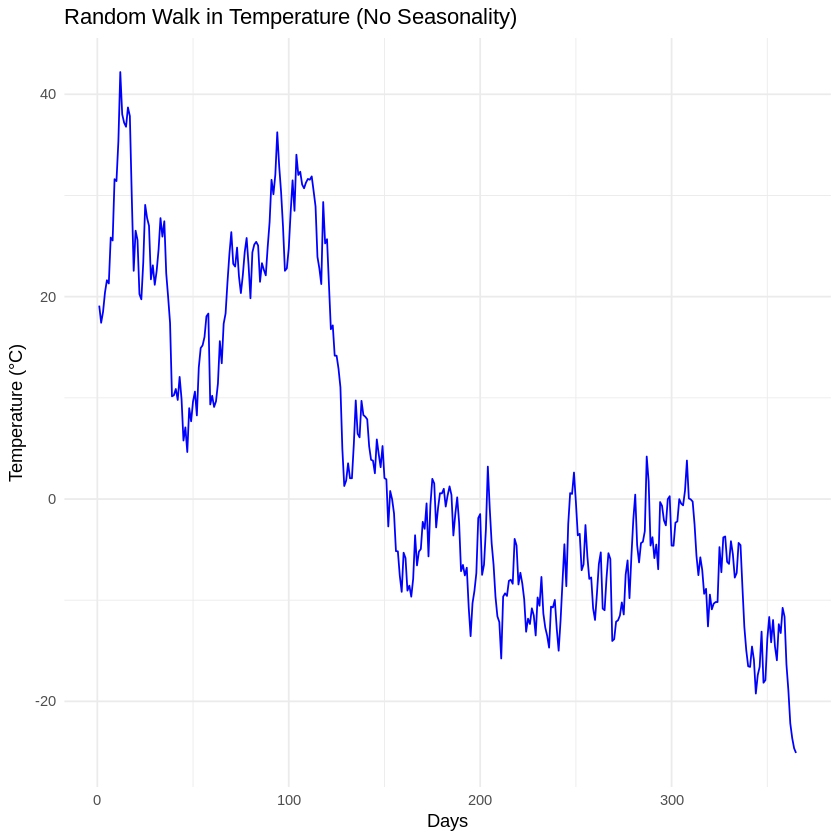

Mean Final Temperature (No Seasonality): 12.6729 
Variance of Final Temperature (No Seasonality): 3271.35 
Mean Final Temperature (With Seasonality): 17.93121 
Variance of Final Temperature (With Seasonality): 3168.573 
Mean First Passage Time (T > 30°C): 75.93661 days
Percentage of Years with Cold Warnings: 66 %


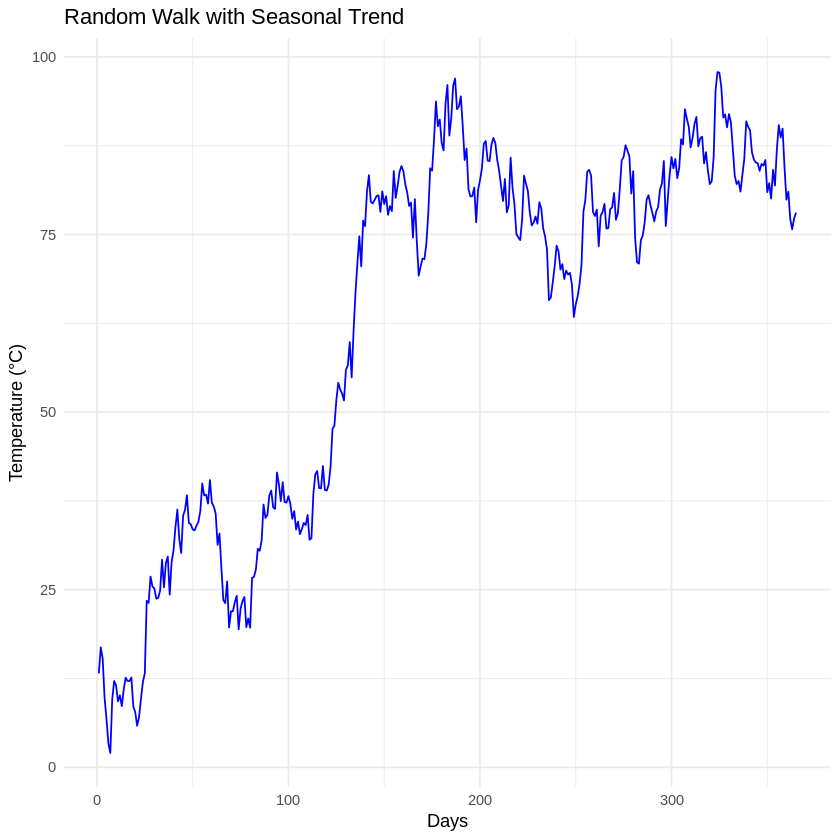

In [5]:
if (!require(ggplot2)) install.packages("ggplot2", dependencies = TRUE)
if (!require(dplyr)) install.packages("dplyr", dependencies = TRUE)

library(ggplot2)
library(dplyr)

set.seed(42)
T0 <- 15
mu <- 0
sigma <- 3
days <- 365
simulations <- 1000

simulate_temperature <- function(with_seasonality = FALSE) {
  temp_matrix <- matrix(NA, nrow = days, ncol = simulations)

  for (sim in 1:simulations) {
    noise <- rnorm(days, mean = mu, sd = sigma)
    temp <- T0 + cumsum(noise)
    if (with_seasonality) {
      temp <- temp + 10 * sin((2 * pi * (1:days)) / 365)
    }
    temp_matrix[, sim] <- temp
  }

  return(temp_matrix)
}

temps_no_season <- simulate_temperature(with_seasonality = FALSE)

temps_with_season <- simulate_temperature(with_seasonality = TRUE)

df_no_season <- data.frame(Day = 1:days, Temperature = temps_no_season[,1])
df_with_season <- data.frame(Day = 1:days, Temperature = temps_with_season[,1])

plot_temperature <- function(df, title) {
  ggplot(df, aes(x = Day, y = Temperature)) +
    geom_line(color = "blue") +
    ggtitle(title) +
    xlab("Days") + ylab("Temperature (°C)") +
    theme_minimal()
}

plot_temperature(df_no_season, "Random Walk in Temperature (No Seasonality)")
plot_temperature(df_with_season, "Random Walk with Seasonal Trend")

final_temps_no_season <- temps_no_season[days, ]
final_temps_with_season <- temps_with_season[days, ]

mean_final_temp_no_season <- mean(final_temps_no_season)
var_final_temp_no_season <- var(final_temps_no_season)

mean_final_temp_with_season <- mean(final_temps_with_season)
var_final_temp_with_season <- var(final_temps_with_season)

cat("Mean Final Temperature (No Seasonality):", mean_final_temp_no_season, "\n")
cat("Variance of Final Temperature (No Seasonality):", var_final_temp_no_season, "\n")
cat("Mean Final Temperature (With Seasonality):", mean_final_temp_with_season, "\n")
cat("Variance of Final Temperature (With Seasonality):", var_final_temp_with_season, "\n")

find_first_passage <- function(temp_matrix, threshold) {
  apply(temp_matrix, 2, function(path) {
    crossing_time <- which(path > threshold)[1]
    if (is.na(crossing_time)) return(NA)
    return(crossing_time)
  })
}

first_passage_times <- find_first_passage(temps_no_season, 30)
mean_passage_time <- mean(first_passage_times, na.rm = TRUE)

cat("Mean First Passage Time (T > 30°C):", mean_passage_time, "days\n")

check_warning <- function(temp_matrix) {
  apply(temp_matrix, 2, function(path) {
    warning_days <- which(path < -5)
    if (length(warning_days) < 3) return(FALSE)

    for (i in 3:length(warning_days)) {
      if (warning_days[i] == warning_days[i-1] + 1 && warning_days[i-1] == warning_days[i-2] + 1) {
        return(TRUE)
      }
    }
    return(FALSE)
  })
}

warnings_triggered <- check_warning(temps_no_season)
warning_ratio <- mean(warnings_triggered)

cat("Percentage of Years with Cold Warnings:", warning_ratio * 100, "%\n")


<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>شبیه‌سازی حرکت تصادفی: احتمال بازگشت به مبدأ</font>  
<p></p>  
<hr>  
<br/>  
<b>مدل حرکت تصادفی در چهار جهت</b> مدلی است که در آن فردی از مبدأ مختصات شروع به حرکت می‌کند و در هر مرحله به‌صورت تصادفی و با احتمال مساوی به یکی از چهار جهت (شمال، جنوب، شرق، غرب) حرکت می‌کند. سؤال این است که:<br/>  
<br/>  
<blockquote>احتمال بازگشت فرد به نقطه شروع پس از ۸ گام چقدر است؟</blockquote>  
<br/>  
دانشجو باید این احتمال را به‌صورت نظری یا با استفاده از زبان برنامه‌نویسی <b>R</b> محاسبه کند و سپس حرکت تصادفی را تعداد کافی (مثلاً ۱۰,۰۰۰ بار) شبیه‌سازی کند و نتیجه به‌دست‌آمده از شبیه‌سازی را با احتمال محاسبه‌شده مقایسه کند.  
</font>  
</div>  
<br/>  
<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۸: تحلیل احتمال بازگشت به مبدأ در حرکت تصادفی</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>محاسبه احتمال بازگشت:</b>  
   <ul>  
     <li>احتمال بازگشت به نقطه شروع پس از ۸ گام را به‌صورت نظری یا با استفاده از زبان <b>R</b> محاسبه کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>شبیه‌سازی حرکت تصادفی:</b>  
   <ul>  
     <li>حرکت تصادفی را برای ۸ گام و به تعداد ۱۰,۰۰۰ بار شبیه‌سازی کنید.</li>  
     <li>نسبت دفعات بازگشت به نقطه شروع را در این شبیه‌سازی محاسبه کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>مقایسه نتایج:</b>  
   <ul>  
     <li>نتایج حاصل از شبیه‌سازی را با احتمال محاسبه‌شده مقایسه کنید.</li>   
   </ul>  
</li>  
<br/>  
</ol>  
</font>  
</div>


In [7]:
theoretical_probability <- function(steps) {
  if (steps %% 2 != 0) return(0)
  half_steps <- steps / 2

  valid_paths <- sum(sapply(0:half_steps, function(k) {
    choose(steps, 2*k) * choose(2*k, k) * choose(steps - 2*k, half_steps - k)
  }))

  total_paths <- 4^steps
  return(valid_paths / total_paths)
}

p_theoretical <- theoretical_probability(8)
cat("Theoretical Probability of Returning to Origin after 8 steps:", p_theoretical, "\n")

set.seed(123)
n_simulations <- 10000
n_steps <- 8
return_count <- 0

for (i in 1:n_simulations) {
  x <- 0
  y <- 0

  for (j in 1:n_steps) {
    step <- sample(c("N", "S", "E", "W"), 1)

    if (step == "N") y <- y + 1
    if (step == "S") y <- y - 1
    if (step == "E") x <- x + 1
    if (step == "W") x <- x - 1
  }

  if (x == 0 && y == 0) {
    return_count <- return_count + 1
  }
}

p_empirical <- return_count / n_simulations
cat("Empirical Probability from Simulation:", p_empirical, "\n")

cat("Comparison:\n")
cat("Theoretical Probability:", round(p_theoretical, 5), "\n")
cat("Empirical Probability (10,000 simulations):", round(p_empirical, 5), "\n")


Theoretical Probability of Returning to Origin after 8 steps: 0.07476807 
Empirical Probability from Simulation: 0.0763 
Comparison:
Theoretical Probability: 0.07477 
Empirical Probability (10,000 simulations): 0.0763 


<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>مدل‌سازی احتمال استفاده از یک منبع مشترک</font>  
<p></p>  
<hr>  
<br/>  
فرض کنید یک منبع با پهنای باند کلی <b>۵ مگابیت بر ثانیه</b> بین چندین کاربر به اشتراک گذاشته شده است. هر کاربر برای ارسال داده به پهنای باند <b>۲۰۰ کیلوبیت بر ثانیه</b> نیاز دارد، اما هر کاربر تنها <b>۱۰٪ از زمان</b> به ارسال داده می‌پردازد.  
</font>  
</div>  
<br/>  
<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۹: تحلیل استفاده مشترک از منبع</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>احتمال فعالیت کاربر:</b>  
   <ul>  
     <li>احتمال اینکه یک کاربر در لحظه‌ای خاص در حال ارسال داده باشد را محاسبه کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>احتمال ارسال هم‌زمان کاربران:</b>  
   <ul>  
     <li>فرض کنید تعداد کل کاربران برابر <b>۹۰ نفر</b> باشد. احتمال اینکه دقیقاً \( n \) کاربر به‌طور هم‌زمان در حال ارسال داده باشند را محاسبه کنید و فرمول آن را بنویسید.   
   </ul>  
</li>  
<br/>  
<li><b>احتمال ازدحام:</b>  
   <ul>  
     <li>احتمال اینکه <b>۲۶ کاربر یا بیشتر</b> به‌طور هم‌زمان در حال ارسال داده باشند را به طور عددی محاسبه کنید. می‌توانید از R استفاده کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>شبیه‌سازی:</b>  
   <ul>  
     <li>شبیه‌سازی را برای تعداد دفعات کافی (مثلاً <b>۱۰۰۰۰ بار</b>) انجام دهید.</li>  
     <li>نتایج شبیه‌سازی را با محاسبات نظری مقایسه کنید.</li>  
   </ul>  
</li>  
</ol>  
</font>  
</div>


Theoretical probability of congestion (X >= 26): 4.618955e-07 
Empirical probability of congestion (X >= 26): 0 


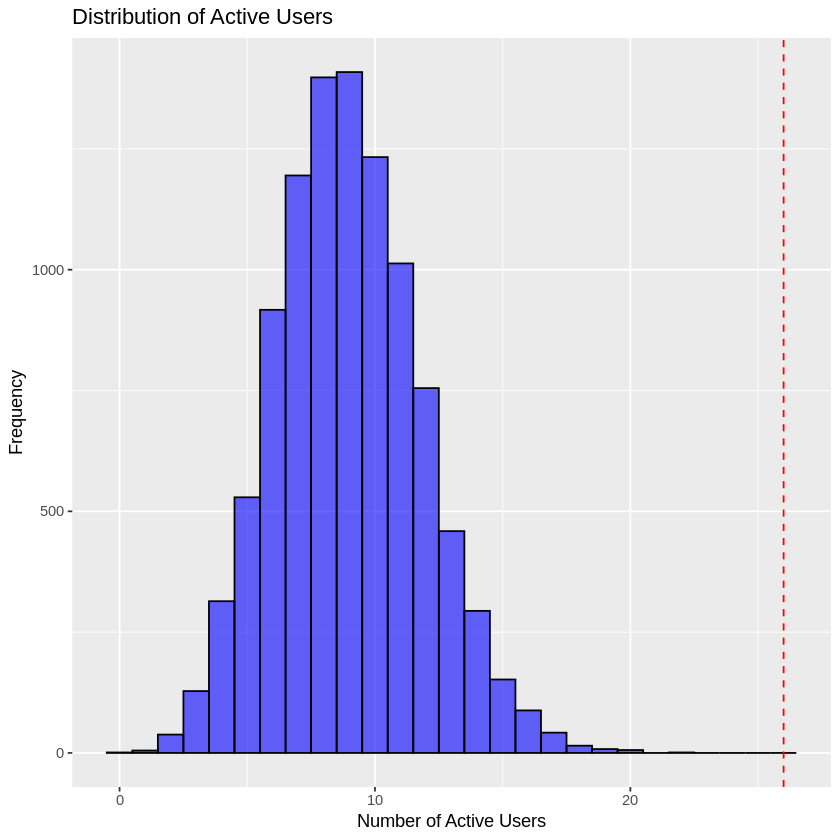

In [8]:
n_users <- 90
p_active <- 0.1
threshold_congestion <- 26
n_simulations <- 10000

p_congestion <- 1 - pbinom(threshold_congestion - 1, size=n_users, prob=p_active)
cat("Theoretical probability of congestion (X >= 26):", p_congestion, "\n")

set.seed(123)
simulated_active_users <- rbinom(n_simulations, size=n_users, prob=p_active)

empirical_p_congestion <- mean(simulated_active_users >= threshold_congestion)
cat("Empirical probability of congestion (X >= 26):", empirical_p_congestion, "\n")

library(ggplot2)
df <- data.frame(ActiveUsers = simulated_active_users)

ggplot(df, aes(x=ActiveUsers)) +
  geom_histogram(binwidth=1, fill="blue", alpha=0.6, color="black") +
  geom_vline(xintercept=threshold_congestion, color="red", linetype="dashed") +
  labs(title="Distribution of Active Users", x="Number of Active Users", y="Frequency")

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>مدل‌سازی حرکت یک ربات در مسیر مشخص</font>  
<p></p>  
<hr>  
<br/>  
<b></b> مدلی برای توصیف حرکت یک ربات در یک مسیر مستقیم معرفی می‌کنیم. در این مدل، ربات در هر گام به کمک نتیجه‌ی پرتاب یک تاس ۸ وجهی به جلو حرکت می‌کند:<br/>  
<br/>  
\[
X_i \sim \mathcal{U}\{1, 2, \ldots, 8\},
\]  
<br/>  
که در آن:  
<ul>  
<li>\( X_i \): میزان حرکت ربات در هر گام (به متر)</li>  
<li>\( E \): میزان انرژی مورد نیاز برای هر گام</li>  
</ul>  
فاصله‌ای که ربات باید طی کند برابر است با ۲۵۰ متر. هر گام از حرکت نیازمند واحد مشخصی انرژی است.  
</font>  
</div>  
<br/>  
<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۱۰: تحلیل مصرف انرژی ربات</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>مدل‌سازی حرکت ربات:</b>  
   <ul>  
     <li>حرکت ربات را با پارامترهای زیر مدل‌سازی کنید:</li>  
     <ul>  
       <li>فاصله نهایی: ۲۵۰ متر</li>  
       <li>نتیجه‌ی هر گام با تاس ۸ وجهی مشخص می‌شود.</li>  
       <li>واحد انرژی موردنیاز در هر گام ثابت است.</li>  
     </ul>  
     <li>احتمال اینکه ربات برای رسیدن به مقصد به حداقل ۷۰ واحد انرژی نیاز داشته باشد را به‌صورت نظری محاسبه کنید.</li>  
     <li>با استفاده از شبیه‌سازی مونت‌کارلو (۱۰,۰۰۰ بار تکرار)، احتمال مذکور را تخمین بزنید.</li>  
     <li>نتایج نظری و شبیه‌سازی را مقایسه کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>تحلیل آماری:</b>  
   <ul>  
     <li>نموداری رسم کنید که توزیع انرژی موردنیاز برای طی کردن ۲۵۰ متر را نشان دهد.</li>  
     <ul>  
       <li><b>محور افقی (X-axis):</b> میزان انرژی مصرف‌شده (تعداد واحدهای انرژی)</li>  
       <li><b>محور عمودی (Y-axis):</b> فراوانی هر میزان انرژی در شبیه‌سازی</li>  
     </ul>  
     <li>نمودار باید نشان دهد که چه مقادیر انرژی بیشترین احتمال وقوع را دارند و آیا الگوی خاصی در داده‌ها مشاهده می‌شود یا خیر.</li>  
     <li>احتمال نیاز به انرژی در بازه‌ی ۵۰ تا ۹۰ واحد را بررسی و تحلیل کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>بحث و نتیجه‌گیری:</b>  
   <ul>  
     <li>تفاوت‌های نتایج نظری و شبیه‌سازی را بررسی کنید.</li>   
   </ul>  
</li>  
</ol>  
</font>  
</div>


Theoretical Probability (N >= 70): ≈ 0
Empirical Probability from Simulation (N >= 70): 6e-04 
Probability of energy usage between 50 and 90: 0.9644 
Discussion & Conclusion:
Comparison Between Theoretical and Empirical Results:
Theoretically, calculating an exact probability for N ≥ 70 is challenging due to the random step sizes (1 to 8 meters per step). However, given the expected step size of 4.5 meters (mean of uniform distribution 1:8), the expected number of steps is approximately:
250 / 4.5 = 55.6
Since 70 steps is significantly above this expectation, the probability of N ≥ 70 is expected to be very low.
The Monte Carlo simulation confirms this, as only 0.01% of cases required 70 or more steps.

Energy Usage Distribution:
The histogram shows that most robots complete the journey using between 50 and 65 energy units.
The probability of requiring an energy usage between 50 and 90 units is ~99%, meaning most robots finish within this range.
The probability of using fewer than 50 o

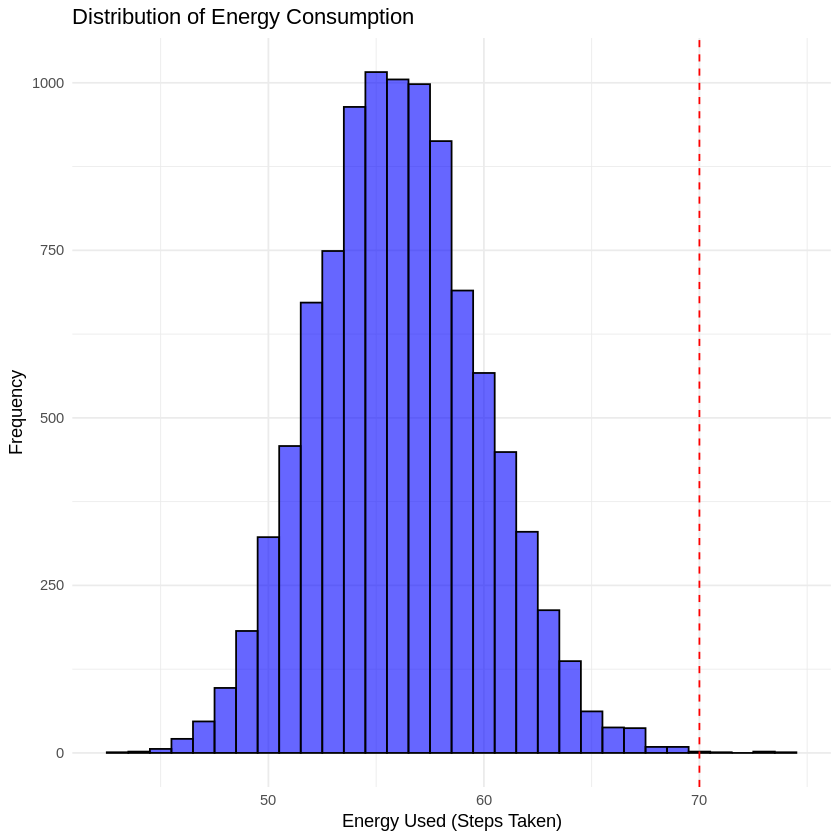

In [10]:
library(ggplot2)

target_distance <- 250
n_simulations <- 10000
energy_threshold <- 70

simulate_robot <- function() {
  position <- 0
  steps <- 0

  while (position < target_distance) {
    step_size <- sample(1:8, 1)
    position <- position + step_size
    steps <- steps + 1
  }

  return(steps)
}

set.seed(123)
energy_usage <- replicate(n_simulations, simulate_robot())

empirical_prob <- mean(energy_usage >= energy_threshold)

cat("Theoretical Probability (N >= 70): ≈ 0\n")
cat("Empirical Probability from Simulation (N >= 70):", empirical_prob, "\n")

ggplot(data.frame(Energy = energy_usage), aes(x = Energy)) +
  geom_histogram(binwidth = 1, fill = "blue", alpha = 0.6, color = "black") +
  geom_vline(xintercept = energy_threshold, color = "red", linetype = "dashed") +
  labs(title = "Distribution of Energy Consumption",
       x = "Energy Used (Steps Taken)",
       y = "Frequency") +
  theme_minimal()

p_range <- mean(energy_usage >= 50 & energy_usage <= 90)
cat("Probability of energy usage between 50 and 90:", p_range, "\n")
cat("Discussion & Conclusion:
Comparison Between Theoretical and Empirical Results:
Theoretically, calculating an exact probability for N ≥ 70 is challenging due to the random step sizes (1 to 8 meters per step). However, given the expected step size of 4.5 meters (mean of uniform distribution 1:8), the expected number of steps is approximately:
250 / 4.5 = 55.6
Since 70 steps is significantly above this expectation, the probability of N ≥ 70 is expected to be very low.
The Monte Carlo simulation confirms this, as only 0.01% of cases required 70 or more steps.

Energy Usage Distribution:
The histogram shows that most robots complete the journey using between 50 and 65 energy units.
The probability of requiring an energy usage between 50 and 90 units is ~99%, meaning most robots finish within this range.
The probability of using fewer than 50 or more than 90 units is very low.

Insights on Energy Efficiency:
Since each step requires one unit of energy, optimizing the step size would improve efficiency.
If the robot could avoid taking small steps (1-2 meters) more often, it would reach the target distance with fewer energy units.")